## Load required packages

In [ ]:
!pip install DataLoader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for DataLoader: filename=dataloader-2.0-py3-none-any.whl size=10100 sha256=095d0ac98d947e28b94e44fdd609aa0171bd3e17ed0905efc0b942431ef8011a
  Stored in directory: /root/.cache/pip/wheels/97/15/34/fb3fcd05c49775824250f2ed4d0d983306962b4ff9052dc60f
Successfully built DataLoader


In [ ]:
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 44.7 MB/s 
     |████████████████████████████████| 60.2 MB 3.3 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 1.3 MB 39.5 MB/s 
     |████████████████████████████████| 840 kB 35.1 MB/s 
     |████████████████████████████████| 238 kB 19.2 MB/s 
     |████████████████████████████████| 10.9 MB 37.4 MB/s 
     |████████████████████████████████| 77 kB 5.0 MB/s 
     |████████████████████████████████| 128 kB 49.2 MB/s 
     |████████████████████████████████| 3.4 MB 40.9 MB/s 
     |████████████████████████████████| 25.3 MB 4.3 MB/s 
     |████████████████████████████████| 352 kB 45.4 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 
     |████████████████████████████████| 40 kB 6.0 MB/s 
     |████████████████████████████████|

In [ ]:
from typing import Tuple

from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker import image_classifier

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Create data loader

In [ ]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_model_maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://google-coral.github.io/py-repo/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = DataLoader.from_folder('/content/drive/MyDrive/AutismDataset/consolidated')
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

## View some samples

In [ ]:
import cv2

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method


Autistic


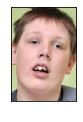

Non_Autistic


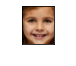

Non_Autistic


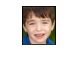

Autistic


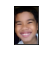

Autistic


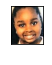

In [ ]:
plt.figure(figsize=(15, 10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(5)):
  plt.subplot(5, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  cv2.putText(image.numpy(),str(data.index_to_label[label.numpy()]), (1,1), font, 
                   fontScale, color, thickness, cv2.LINE_AA)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  print(data.index_to_label[label.numpy()])
  plt.xlabel(data.index_to_label[label.numpy()], color='white')
  plt.show()

## Train a model

In [ ]:
model = image_classifier.create(
    train_data,
    model_spec='efficientnet_lite0',
    epochs=37,
    validation_data=validation_data
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/37
6/6 [==============================] - 11s 1s/step - loss: 0.7297 - accuracy: 0.5781 - val_loss: 0.7971 - val_accuracy: 0.3704
Epoch 2/37
6/6 [==============================] - 9s 1s/step - loss: 0.6657 - accuracy: 0.6146 

## Test the model

In [ ]:
loss, accuracy = model.evaluate(test_data)
predicts = model.predict_top_k(test_data, k=2)

1/1 [==============================] - 5s 5s/step - loss: 0.6656 - accuracy: 0.7037


predict label: Non_Autistic test label Non_Autistic


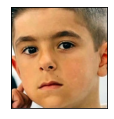

predict label: Autistic test label Non_Autistic


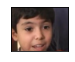

predict label: Non_Autistic test label Non_Autistic


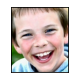

predict label: Non_Autistic test label Non_Autistic


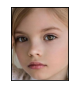

predict label: Non_Autistic test label Non_Autistic


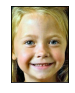

predict label: Autistic test label Autistic


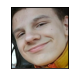

predict label: Non_Autistic test label Autistic


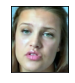

predict label: Non_Autistic test label Autistic


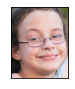

predict label: Autistic test label Autistic


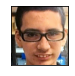

predict label: Non_Autistic test label Autistic


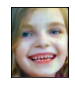

In [ ]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'white'
  else:
    return 'red'

plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(10)):
  ax = plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  predict_label = predicts[i][0][0]
  print("predict label:",predict_label,"test label:",test_data.index_to_label[label.numpy()])
  #cv2.putText(predict_label,label)
  #color = get_label_color(predict_label,test_data.index_to_label[label.numpy()])
  #ax.xaxis.label.set_color(color)
  #plt.xlabel(predict_label)
  plt.show()

## Export the model

In [ ]:
model.export(
    export_dir='./models',
    tflite_filename='tensor_model.tflite'
)

/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


## Predict on a single image

In [ ]:
MODEL_PATH = '/content/drive/MyDrive/Capstone/transformer/tensor_model.tflite'

def get_interpreter(model_path: str) -> Tuple:
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    return interpreter, input_details, output_details

def predict(image_path: str) -> int:
    interpreter, input_details, output_details = get_interpreter(MODEL_PATH)
    input_shape = input_details[0]['shape']
    img = tf.io.read_file(image_path)
    img = tf.io.decode_image(img, channels=3)
    img = tf.image.resize(img, (input_shape[2], input_shape[2]))
    img = tf.expand_dims(img, axis=0)
    resized_img = tf.cast(img, dtype=tf.uint8)
    
    interpreter.set_tensor(input_details[0]['index'], resized_img)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    results = np.squeeze(output_data)
    return np.argmax(results, axis=0)

In [ ]:
predict('/content/drive/MyDrive/AutismDataset/test/Autistic/Autistic.0.jpg')

0

In [ ]:
predict('/content/drive/MyDrive/AutismDataset/test/Non_Autistic/Non_Autistic.100.jpg')

1